<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/R_Clustering_RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("tidyverse"), dependencies = TRUE)
install.packages(c("magrittr"), dependencies = TRUE)
install.packages(c("cluster"), dependencies = TRUE)
install.packages(c("cluster.datasets"), dependencies = TRUE)
install.packages(c("cowplot"), dependencies = TRUE)
install.packages(c("NbClust"), dependencies = TRUE)
install.packages(c("clValid"), dependencies = TRUE)
install.packages(c("ggfortify"), dependencies = TRUE)
install.packages(c("clustree"), dependencies = TRUE)
install.packages(c("dendextend"), dependencies = TRUE)
install.packages(c("car"), dependencies = TRUE)
install.packages(c("factoextra"), dependencies = TRUE)
install.packages(c("FactoMineR"), dependencies = TRUE)
install.packages(c("corrplot"), dependencies = TRUE)
install.packages(c("GGally"), dependencies = TRUE)
install.packages(c("ggiraphExtra"), dependencies = TRUE)
install.packages(c("knitr"), dependencies = TRUE)
install.packages(c("kableExtra"), dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘covr’, ‘feather’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘proxy’, ‘lambda.r’, ‘futile.options’, ‘e1071’, ‘textshaping’, ‘futile.logger’, ‘Cairo’, ‘gridGraphics’, ‘magick’, ‘maps’, ‘PASWR’, ‘patchwork’, ‘ragg’, ‘vdiffr’, ‘VennDiagram’


Warning message in install.packages(c("cowplot"), dependencies = TRUE):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(c("cowplot"), dependencies = TRUE):
“installation of package ‘Cairo’ had non-zero exit status”
Warning message in ins

In [2]:
library(tidyverse)
library(magrittr)
library(cluster)
library(cluster.datasets)
library(cowplot)
library(NbClust)
library(clValid)
library(ggfortify)
library(clustree)
library(dendextend)
library(factoextra)
library(FactoMineR)
library(corrplot)
library(GGally)
library(ggiraphExtra)
library(knitr)
library(kableExtra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: ggraph


---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https:/

In [174]:
df <- read.csv("https://raw.githubusercontent.com/kdemertzis/datashare/main/rbmnew.csv", 
                 header = FALSE,
                 sep = ",")

In [175]:
glimpse(df)

Rows: 7,249
Columns: 80
$ V1  <dbl> 0.10109, 0.10049, 0.10109, 0.10177, 0.10109, 0.10177, 0.10049, 0.1…
$ V2  <dbl> 1.37294, 1.34594, 1.17900, 1.42703, 1.31297, 1.47082, 1.35250, 1.3…
$ V3  <dbl> 395.4383, 406.6128, 395.4383, 394.2147, 395.4383, 394.2147, 406.61…
$ V4  <dbl> 1115.2626, 1057.2184, 1115.2626, 1086.2676, 1115.2626, 1086.2676, …
$ V5  <dbl> 31.81634, 32.96325, 31.81634, 32.43124, 31.81634, 32.43124, 32.963…
$ V6  <dbl> 50.15722, 93.58530, 0.00000, 100.00000, 0.00000, 100.00000, 95.806…
$ V7  <dbl> 2306.12817, 2836.77759, 34.95676, 2842.67358, 34.95676, 2836.91797…
$ V8  <dbl> 35.49597, 36.57688, 35.01112, 36.24439, 35.34605, 36.35387, 36.593…
$ V9  <dbl> 33.98494, 100.00000, 0.00000, 100.00000, 0.00000, 100.00000, 100.0…
$ V10 <dbl> 34.75342, 99.80164, 0.28381, 99.42984, 0.29144, 99.11787, 99.79400…
$ V11 <dbl> 0, 0, 100, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 100, 10…
$ V12 <dbl> -1.85242, -1.87531, 97.19238, -1.88294, 97.17712, -1.87531, -1.875…
$ V13 <dbl> 65.6

In [184]:
colnames(df) <- c("P1_B2004","P1_B2016","P1_B3004","P1_B3005","P1_B4002","P1_B4005","P1_B400B","P1_B4022","P1_FCV01D","P1_FCV01Z","P1_FCV02D","P1_FCV02Z","P1_FCV03D","P1_FCV03Z","P1_FT01","P1_FT01Z","P1_FT02","P1_FT02Z","P1_FT03","P1_FT03Z","P1_LCV01D","P1_LCV01Z","P1_LIT01","P1_PCV01D","P1_PCV01Z","P1_PCV02D","P1_PCV02Z","P1_PIT01","P1_PIT02","P1_PP01AD","P1_PP01AR","P1_PP01BD","P1_PP01BR","P1_PP02D","P1_PP02R","P1_STSP","P1_TIT01","P1_TIT02","P2_24Vdc","P2_ASD","P2_AutoGO","P2_CO_rpm","P2_Emerg","P2_HILout","P2_MSD","P2_ManualGO","P2_OnOff","P2_RTR","P2_SIT01","P2_SIT02","P2_TripEx","P2_VT01","P2_VTR01","P2_VTR02","P2_VTR03","P2_VTR04","P2_VXT02","P2_VXT03","P2_VYT02","P2_VYT03","P3_FIT01","P3_LCP01D","P3_LCV01D","P3_LH","P3_LIT01","P3_LL","P3_PIT01","P4_HT_FD","P4_HT_LD","P4_HT_PO","P4_HT_PS","P4_LD","P4_ST_FD","P4_ST_GOV","P4_ST_LD","P4_ST_PO","P4_ST_PS","P4_ST_PT01","P4_ST_TT01","attack")

In [185]:
# Glimpse the data set
glimpse(df)

Rows: 7,249
Columns: 80
$ P1_B2004    <dbl> 0.10109, 0.10049, 0.10109, 0.10177, 0.10109, 0.10177, 0.10…
$ P1_B2016    <dbl> 1.37294, 1.34594, 1.17900, 1.42703, 1.31297, 1.47082, 1.35…
$ P1_B3004    <dbl> 395.4383, 406.6128, 395.4383, 394.2147, 395.4383, 394.2147…
$ P1_B3005    <dbl> 1115.2626, 1057.2184, 1115.2626, 1086.2676, 1115.2626, 108…
$ P1_B4002    <dbl> 31.81634, 32.96325, 31.81634, 32.43124, 31.81634, 32.43124…
$ P1_B4005    <dbl> 50.15722, 93.58530, 0.00000, 100.00000, 0.00000, 100.00000…
$ P1_B400B    <dbl> 2306.12817, 2836.77759, 34.95676, 2842.67358, 34.95676, 28…
$ P1_B4022    <dbl> 35.49597, 36.57688, 35.01112, 36.24439, 35.34605, 36.35387…
$ P1_FCV01D   <dbl> 33.98494, 100.00000, 0.00000, 100.00000, 0.00000, 100.0000…
$ P1_FCV01Z   <dbl> 34.75342, 99.80164, 0.28381, 99.42984, 0.29144, 99.11787, …
$ P1_FCV02D   <dbl> 0, 0, 100, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0,…
$ P1_FCV02Z   <dbl> -1.85242, -1.87531, 97.19238, -1.88294, 97.17712, -1.87531…
$ P1_FCV03D   <d

In [186]:
# Summary of data set
summary(df) 

    P1_B2004         P1_B2016        P1_B3004        P1_B3005     
 Min.   :0.1005   Min.   :1.051   Min.   :394.2   Min.   : 985.4  
 1st Qu.:0.1011   1st Qu.:1.324   1st Qu.:395.4   1st Qu.:1057.2  
 Median :0.1011   Median :1.400   Median :395.4   Median :1086.3  
 Mean   :0.1012   Mean   :1.400   Mean   :399.2   Mean   :1072.6  
 3rd Qu.:0.1018   3rd Qu.:1.475   3rd Qu.:403.8   3rd Qu.:1115.3  
 Max.   :0.1018   Max.   :1.956   Max.   :406.6   Max.   :1115.3  
    P1_B4002        P1_B4005         P1_B400B         P1_B4022    
 Min.   :31.82   Min.   :  0.00   Min.   :  29.0   Min.   :34.71  
 1st Qu.:31.82   1st Qu.: 25.07   1st Qu.: 819.6   1st Qu.:35.62  
 Median :32.43   Median : 83.94   Median :2824.6   Median :36.14  
 Mean   :32.34   Mean   : 65.21   Mean   :1953.1   Mean   :36.09  
 3rd Qu.:32.60   3rd Qu.:100.00   3rd Qu.:2836.6   3rd Qu.:36.54  
 Max.   :32.96   Max.   :100.00   Max.   :2856.1   Max.   :37.46  
   P1_FCV01D        P1_FCV01Z         P1_FCV02D        P1_FCV0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



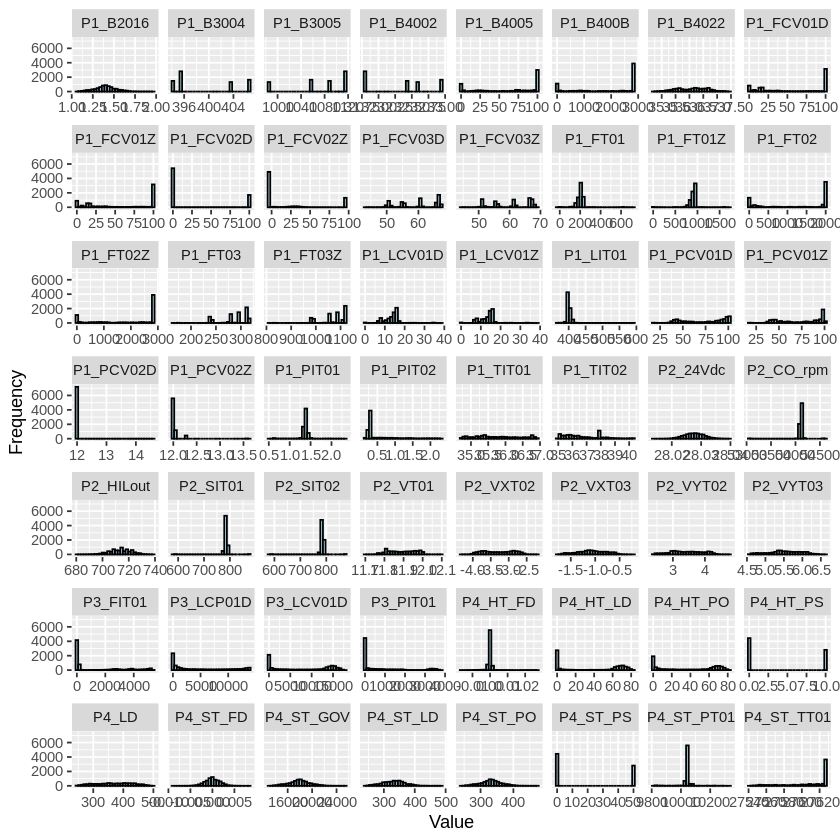

In [193]:
# Historgram for each attribute
df %>% 
  gather(Attributes, value, 2:29, 37:39, 42, 44, 49:50, 52, 57:63, 67:79) %>% 
  ggplot(aes(x=value)) +
  geom_histogram(fill = "lightblue2", color = "black") + 
  facet_wrap(~Attributes, scales = "free_x") +
  labs(x = "Value", y = "Frequency")

Warning message in cor(df):
“the standard deviation is zero”


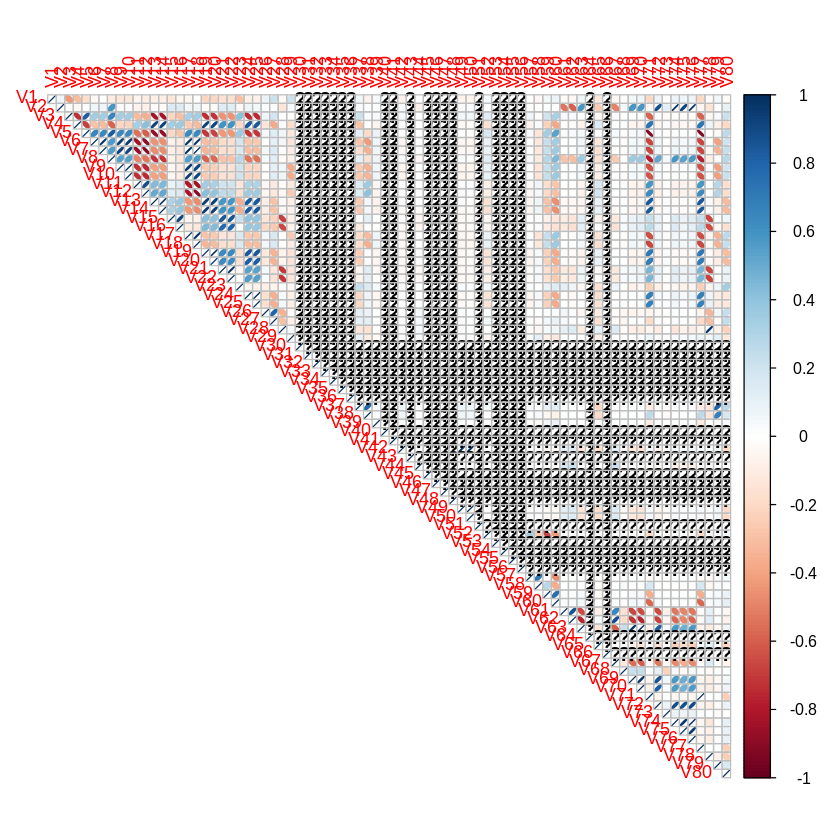

In [183]:
corrplot(cor(df), type = "upper", method = "ellipse", tl.cex = 0.9)

In [145]:
df_scaled <- scale(df)
#rownames(df_scaled) <- df$name

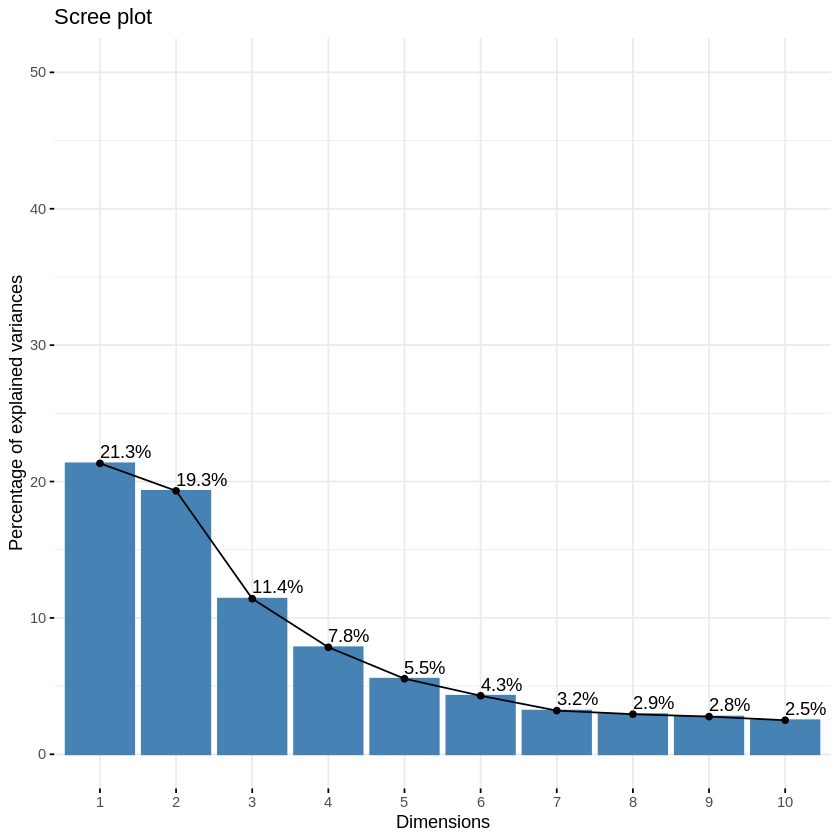

In [150]:
res.pca <- PCA(df,  graph = FALSE)
# Visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

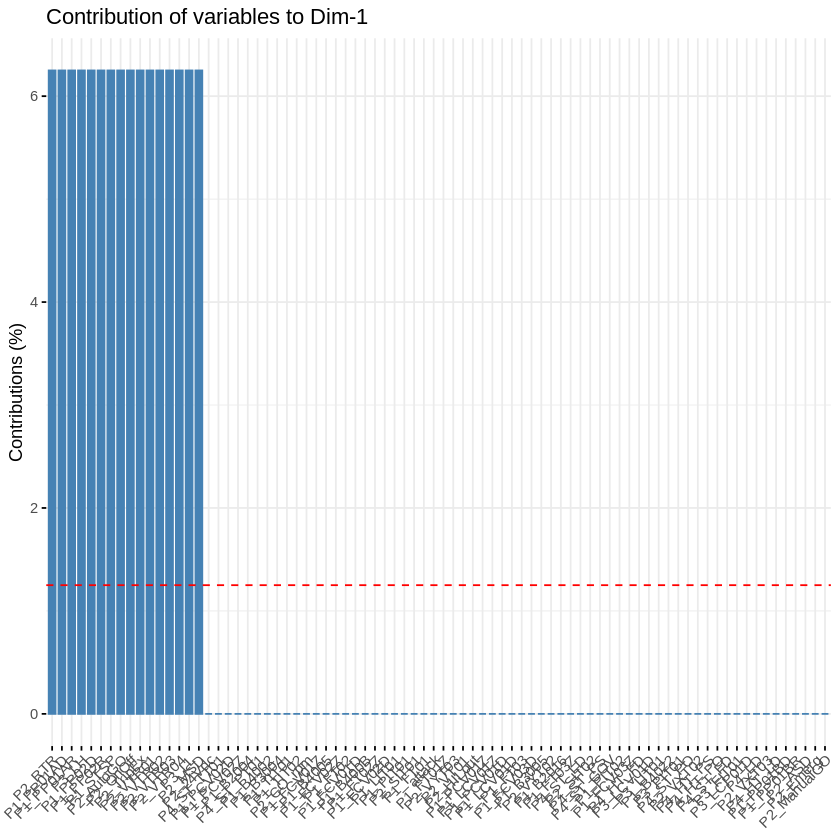

Warning message:
“ggrepel: 61 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


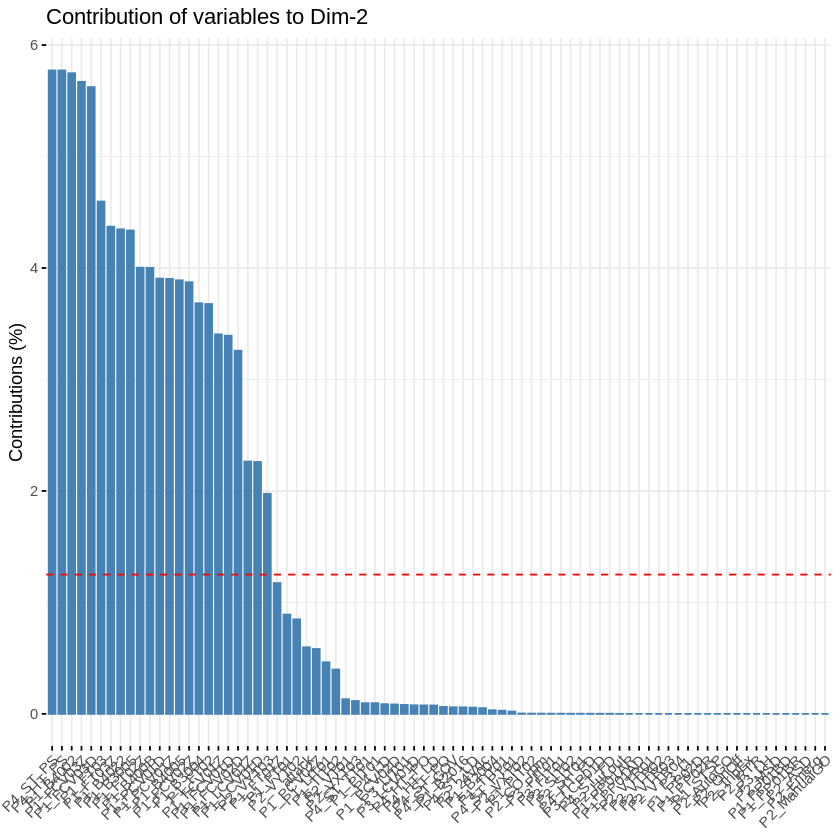

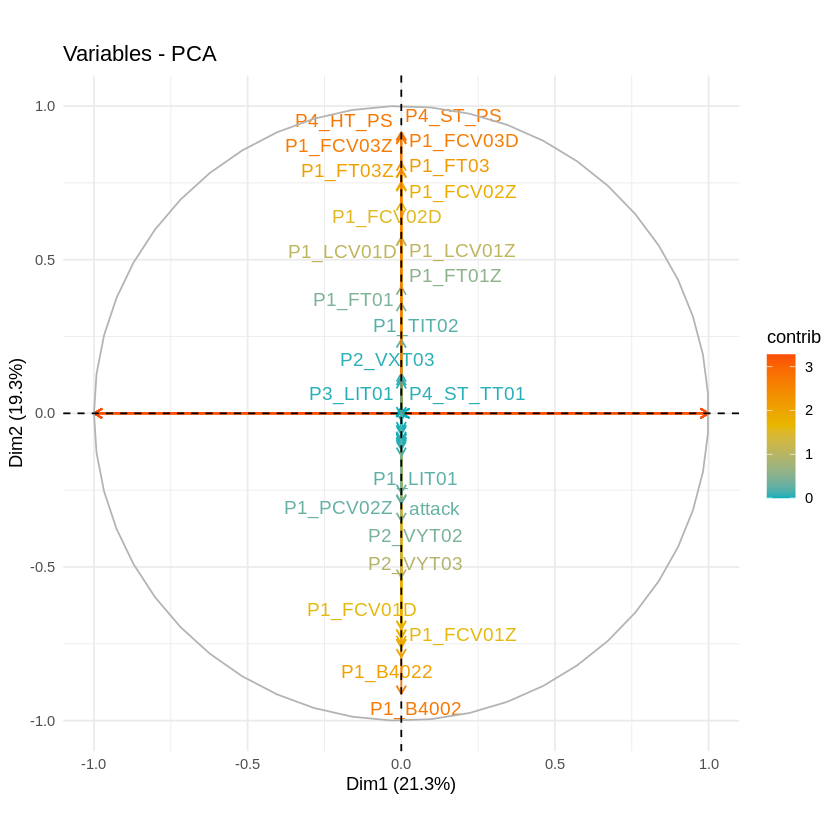

In [155]:
# Extract the results for variables
var <- get_pca_var(res.pca)
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 80)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 80)
# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             ) + theme_minimal() + ggtitle("Variables - PCA")

In [156]:
km2 <- kmeans(df, centers = 2, nstart = 30)

In [160]:
kmean_calc <- function(df, ...){
  kmeans(df, scaled = ..., nstart = 30, method = "ellipse")
}
km2 <- kmean_calc(df, 2)
km3 <- kmean_calc(df, 3)
km4 <- kmeans(df, 4)
km5 <- kmeans(df, 5)
km6 <- kmeans(df, 6)
km7 <- kmeans(df, 7)
km8 <- kmeans(df, 8)
km9 <- kmeans(df, 9)
km10 <- kmeans(df, 10)
km11 <- kmeans(df, 11)
p1 <- fviz_cluster(km2, data = df, frame.type = "convex") + theme_minimal() + ggtitle("k = 2") 
p2 <- fviz_cluster(km3, data = df, frame.type = "convex") + theme_minimal() + ggtitle("k = 3")
p3 <- fviz_cluster(km4, data = df, frame.type = "convex") + theme_minimal() + ggtitle("k = 4")
p4 <- fviz_cluster(km5, data = df, frame.type = "convex") + theme_minimal() + ggtitle("k = 5")
p5 <- fviz_cluster(km6, data = df, frame.type = "convex") + theme_minimal() + ggtitle("k = 6")
p6 <- fviz_cluster(km7, data = df, frame.type = "convex") + theme_minimal() + ggtitle("k = 7")
plot_grid(p1, p2, p3, p4, p5, p6, labels = c("k2", "k3", "k4", "k5", "k6", "k7"))

ERROR: ignored

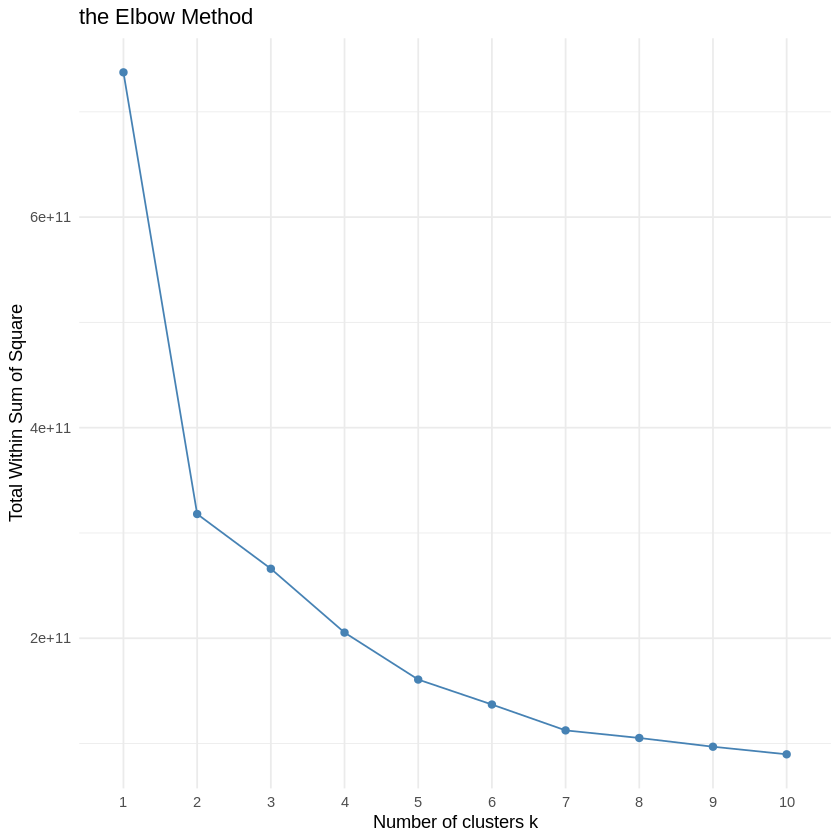

In [158]:
set.seed(66)
# function to compute total within-cluster sum of squares
fviz_nbclust(df, kmeans, method = "wss", k.max = 10) + theme_minimal() + ggtitle("the Elbow Method")

In [154]:
gap_stat <- clusGap(df, FUN = kmeans, nstart = 30, K.max = 10, B = 50)
fviz_gap_stat(gap_stat) + theme_minimal() + ggtitle("fviz_gap_stat: Gap Statistic")

Warning message:
“did not converge in 10 iterations”


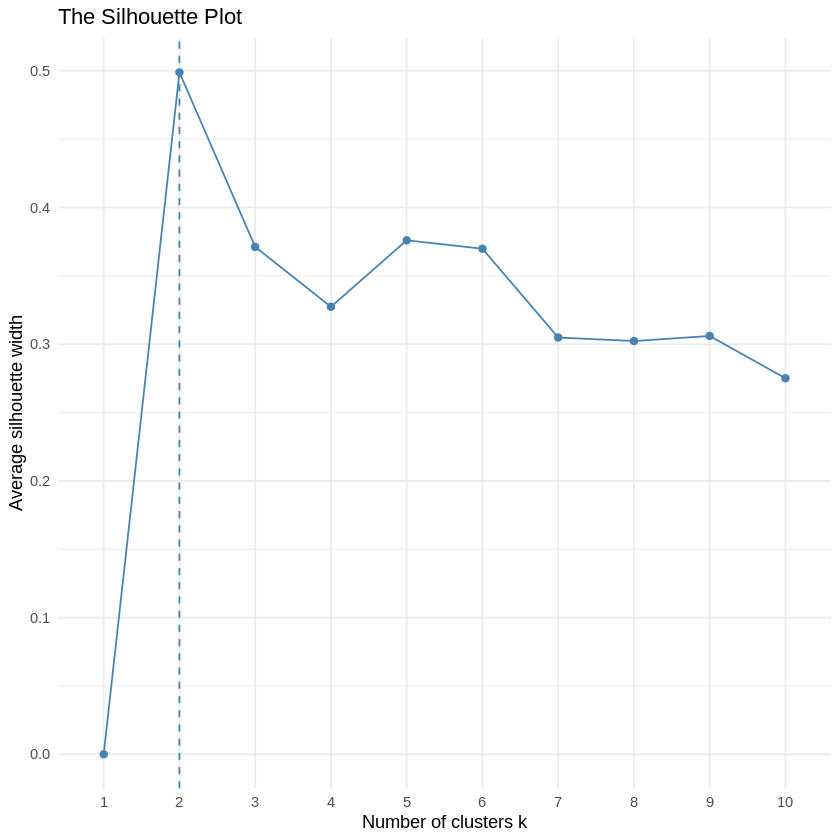

In [161]:
fviz_nbclust(df, kmeans, method = "silhouette", k.max = 10) + theme_minimal() + ggtitle("The Silhouette Plot")

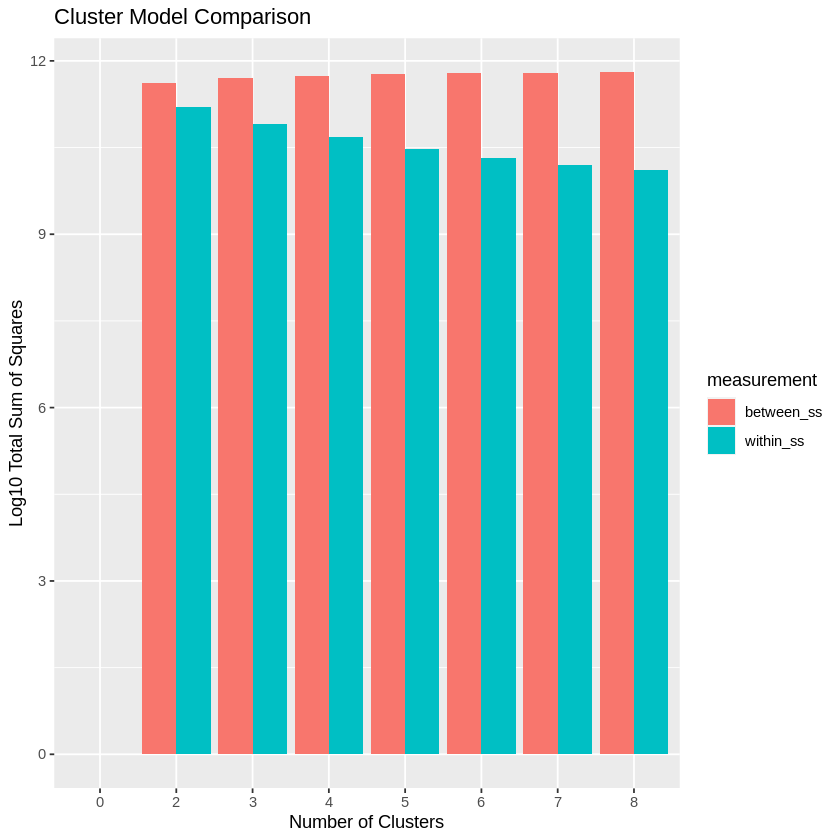

In [162]:
ssc <- data.frame(
  kmeans = c(2,3,4,5,6,7,8),
  within_ss = c(mean(km2$withinss), mean(km3$withinss), mean(km4$withinss), mean(km5$withinss), mean(km6$withinss), mean(km7$withinss), mean(km8$withinss)),
  between_ss = c(km2$betweenss, km3$betweenss, km4$betweenss, km5$betweenss, km6$betweenss, km7$betweenss, km8$betweenss)
)
ssc %<>% gather(., key = "measurement", value = value, -kmeans)
#ssc$value <- log10(ssc$value)
ssc %>% ggplot(., aes(x=kmeans, y=log10(value), fill = measurement)) + geom_bar(stat = "identity", position = "dodge") + ggtitle("Cluster Model Comparison") + xlab("Number of Clusters") + ylab("Log10 Total Sum of Squares") + scale_x_discrete(name = "Number of Clusters", limits = c("0", "2", "3", "4", "5", "6", "7", "8"))

In [163]:
res.nbclust <- NbClust(df, distance = "euclidean",
                  min.nc = 2, max.nc = 9, 
                  method = "complete", index ="all")
factoextra::fviz_nbclust(res.nbclust) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

ERROR: ignored

Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(df, k, nstart = 30):
“number of items to replace is not a multiple of replacement 

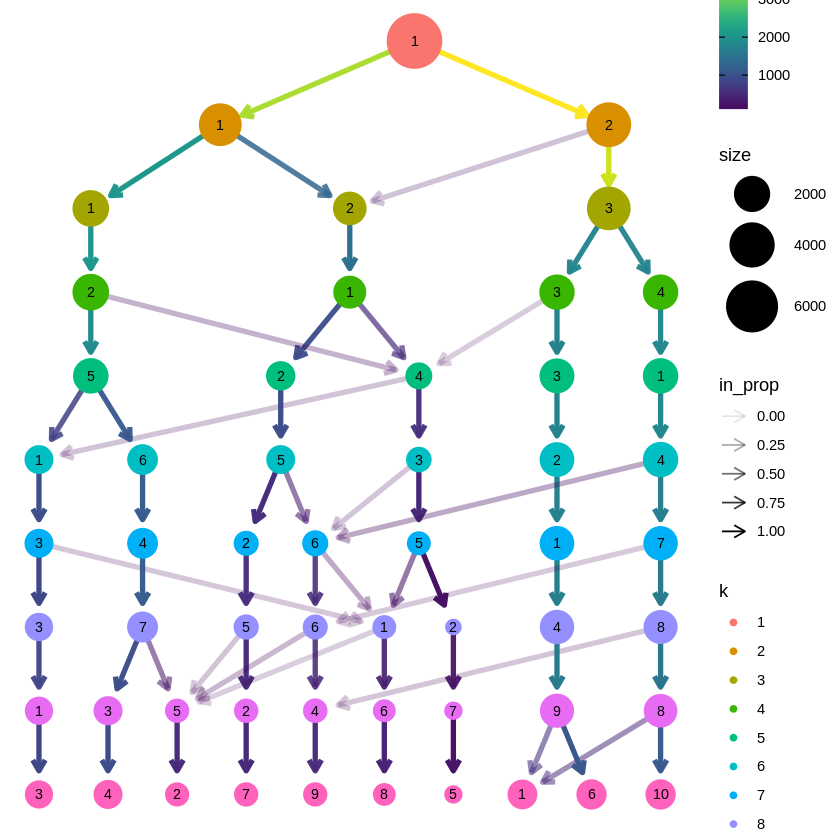

In [164]:
tmp <- NULL
for (k in 1:10){
  tmp[k] <- kmeans(df, k, nstart = 30)
}
df <- data.frame(tmp)
# add a prefix to the column names
colnames(df) <- seq(1:10)
colnames(df) <- paste0("k",colnames(df))
# get individual PCA
df.pca <- prcomp(df, center = TRUE, scale. = FALSE)
ind.coord <- df.pca$x
ind.coord <- ind.coord[,1:2]
df <- bind_cols(as.data.frame(df), as.data.frame(ind.coord))
clustree(df, prefix = "k")

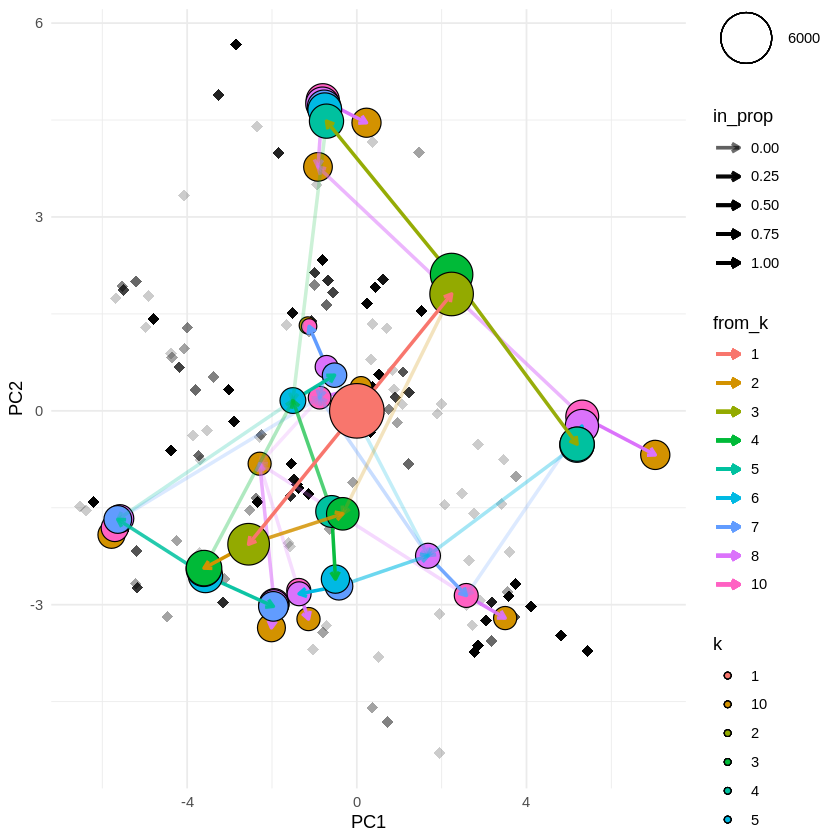

In [165]:
df_subset <- df %>% select(1:8,10:12)
clustree_overlay(df_subset, prefix = "k", x_value = "PC1", y_value = "PC2")

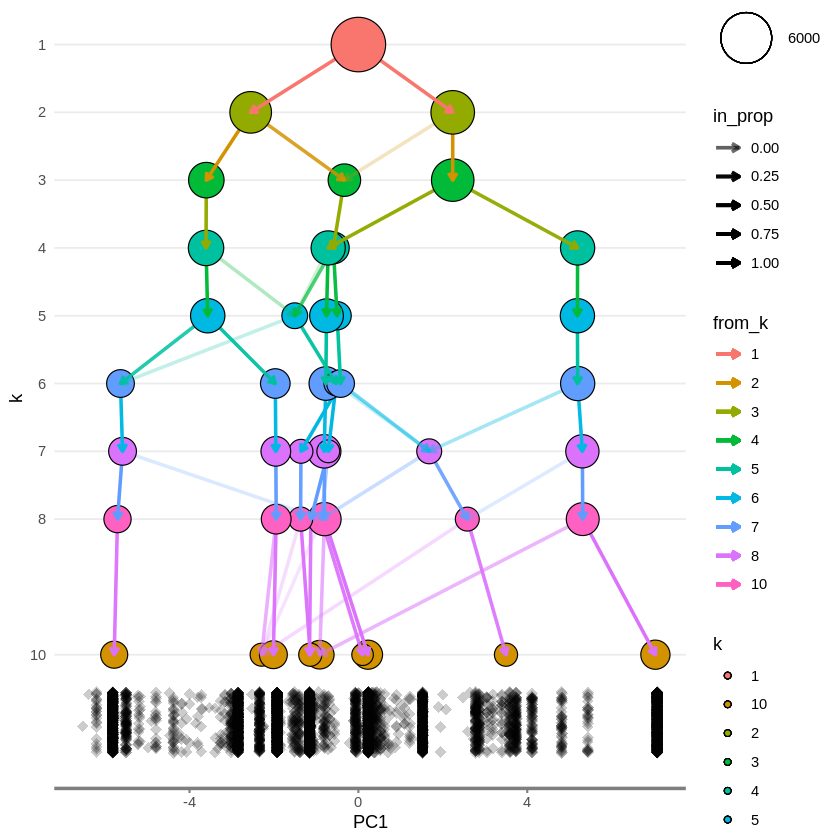

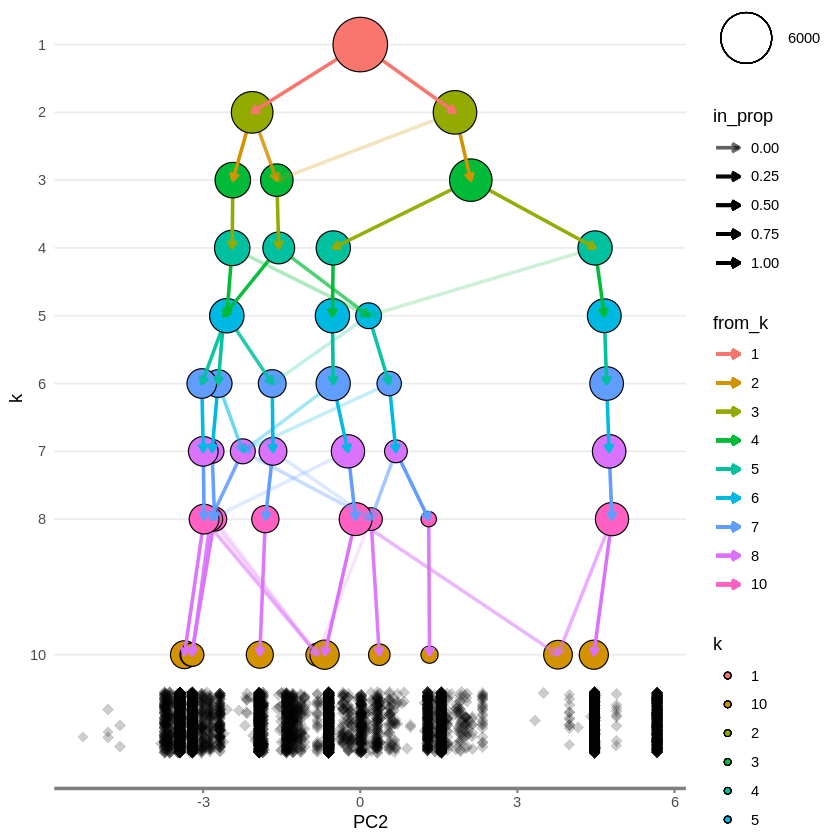

In [166]:
overlay_list <- clustree_overlay(df_subset, prefix = "k", x_value = "PC1",
                                 y_value = "PC2", plot_sides = TRUE)
overlay_list$x_side
overlay_list$y_side

In [167]:
intern <- clValid(df, nClust = 2:10, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")
# Summary
summary(intern) %>% kable() %>% kable_styling()

ERROR: ignored

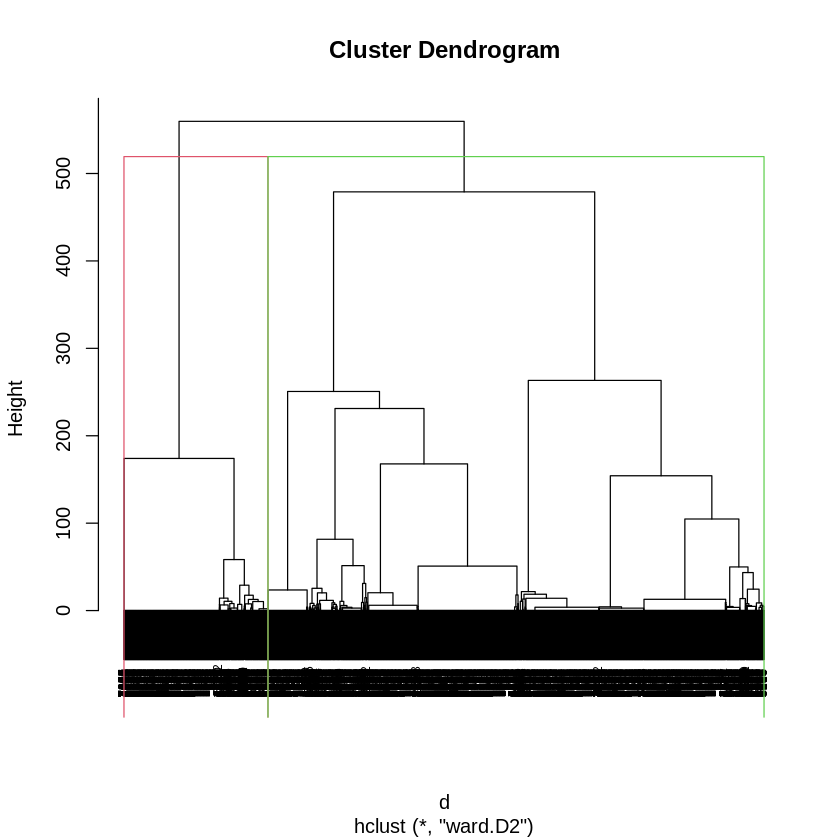

In [168]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(df, method = "euclidean")
# Hierarchical clustering using Ward's method
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 5 groups
grp <- cutree(res.hc, k = 2)
# Visualize
plot(res.hc, cex = 0.6) # plot tree
rect.hclust(res.hc, k = 2, border = 2:5) # add rectangle

In [169]:
# Execution of k-means with k=5
final <- kmeans(df, 2, nstart = 30)
fviz_cluster(final, data = df) + theme_minimal() + ggtitle("k = 2")

ERROR: ignored

In [170]:
as.data.frame(df) %>% mutate(Cluster = final$cluster) %>% group_by(Cluster) %>% summarise_all("mean") %>% kable() %>% kable_styling()

<table class="table" style="margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> Cluster </th>
   <th style="text-align:right;"> k1 </th>
   <th style="text-align:right;"> k2 </th>
   <th style="text-align:right;"> k3 </th>
   <th style="text-align:right;"> k4 </th>
   <th style="text-align:right;"> k5 </th>
   <th style="text-align:right;"> k6 </th>
   <th style="text-align:right;"> k7 </th>
   <th style="text-align:right;"> k8 </th>
   <th style="text-align:right;"> k9 </th>
   <th style="text-align:right;"> k10 </th>
   <th style="text-align:right;"> PC1 </th>
   <th style="text-align:right;"> PC2 </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 1.935961 </td>
   <td style="text-align:right;"> 2.821429 </td>
   <td style="text-align:right;"> 3.616995 </td>
   <td style="text-align:right;"> 1.132389 </td>
   <td style="text-align:right;"> 4